### Analicemos la ecuación

### $\frac{dy}{dx} = 0.2xy$

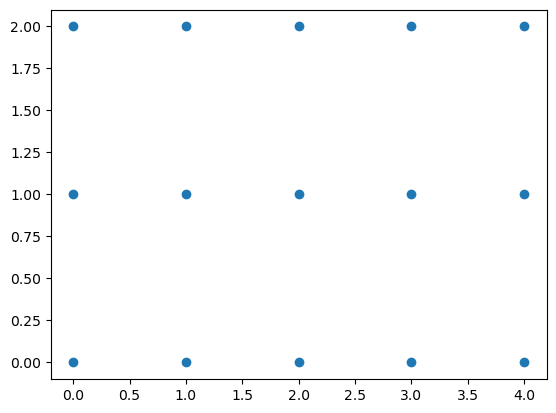

In [2]:
import numpy as np
import matplotlib.pyplot as plt


x = np.arange(0, 5, 1)
y = np.arange(0, 3, 1)
X, Y = np.meshgrid(x, y)
# también se puede usar linespace


# 1. Crear la Figure y los Axes
fig, ax = plt.subplots()

# 2. Usar el método del objeto Axes para hacer el gráfico
ax.scatter(X, Y)






### Hagamos una grilla más densa

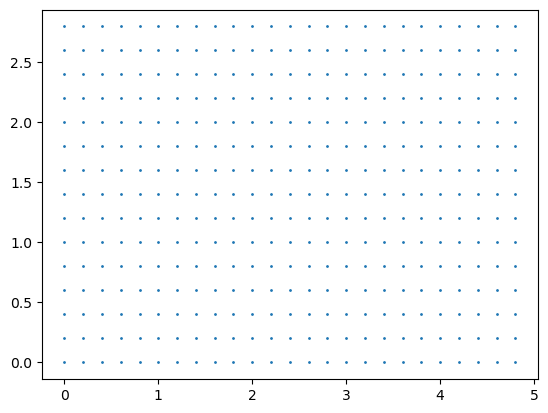

In [3]:
x = np.arange(0, 5, 0.2)
y = np.arange(0, 3, 0.2)
xv, yv = np.meshgrid(x, y)
# también se puede usar linespace


# 1. Crear la Figure y los Axes
fig, ax = plt.subplots()

# 2. Usar el método del objeto Axes para hacer el gráfico
# Usar el parámetro 's' para un tamaño fijo
ax.scatter(xv, yv, s = 1)


### Dibujemos vectores tangentes con [Quiver](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.quiver.html)

**Arrow size**

_The default settings auto-scales the length of the arrows to a reasonable size. To change this behavior see the scale and scale_units parameters._


In [4]:
dy = 0.2*xv*yv
print(dy.shape)

(15, 25)


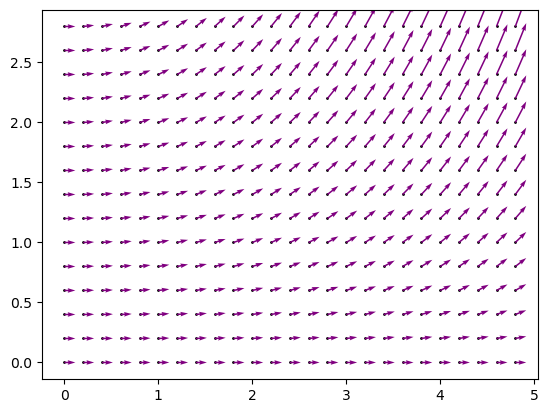

In [5]:
dx = np.ones(dy.shape)

fig, ax = plt.subplots()
ax.scatter(xv,yv,color='k', s =1) 
# ax.grid(True, linestyle='--')
ax.quiver(xv,yv,dx,dy, color='purple')
plt.show()

### Observamos que es estaría bueno NOMRALIZAR LAS FLECHAS

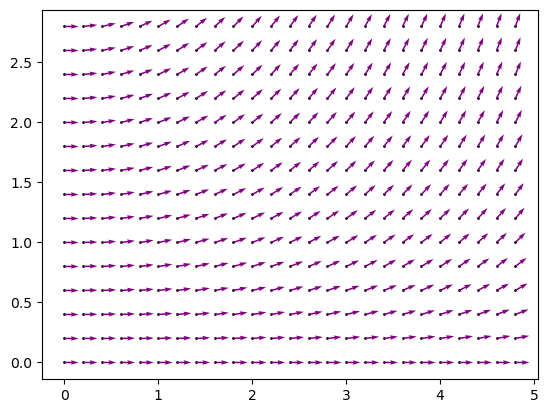

In [6]:

dyu = dy/(np.sqrt(dy**2 + dx**2))
dxu = dx/(np.sqrt(dy**2 + dx**2))

fig, ax = plt.subplots()
ax.scatter(xv,yv,color='k', s =1) 
# ax.grid(True, linestyle='--')
ax.quiver(xv,yv,dxu,dyu, color='purple')
plt.show()

### Ahora hagamos una función que realice esto por nosotros de forma INTELIGENTE.

### TAREA: Hacer función campo

# Euler 

## Ejemplo 1 

### Considere el problema de valor inicial $y' = 0.1\sqrt{y} + 0.4x^2$, $y(2) = 4$. Use el método de Euler para obtener una aproximación de $y(2.5)$ usando primero $h = 0.1$ y luego $h = 0.05$.

In [ ]:
from math import sqrt

fxy = lambda x, y: 0.1*sqrt(y) + 0.4*x**2

def Euler(f, h, rango_variable_independiente, y0):
   """
   PROPÓSITO:
   
   """
   x0, xf = rango_variable_independiente
   x = np.arange(x0 , xf, h)
   
   for x0 in x:
      print(x0, y0)
      y0 = y0 + h*f(x0, y0)
   return y0

Euler(fxy, 0.1, [2, 2.6], 4)




2.0 4
2.1 4.18
2.2 4.376845048300261
2.3000000000000003 4.591365959007733
2.4000000000000004 4.824393431931547
2.5000000000000004 5.076757933819666
2.6000000000000005 5.349289595839632


np.float64(5.642818127128582)

In [11]:
import pandas as pd
def Euler_pandas(f, h, rango_variable_independiente, y0):
   x0, xf = rango_variable_independiente
   x = np.arange(x0 , xf, h)
   y =[y0]
   for x0 in x:
      y0 = y0 + h*f(x0, y0)
      y.append(y0)
   

   print(len(x), len(y))
  
   y = y[:-1]
   df = pd.DataFrame({'x': x, 'y': y})
   
   
   return df

Euler_pandas(fxy, 0.1, [2, 2.6], 4)

7 8


,x,y
0,2.0,4.000000
1,2.1,4.180000
2,2.2,4.376845
3,2.3,4.591366
4,2.4,4.824393
5,2.5,5.076758
6,2.6,5.349290


In [12]:
Euler_pandas(fxy, 0.05, [2, 2.51], 4)

11 12


,x,y
0,2.00,4.000000
1,2.05,4.090000
2,2.10,4.184162
3,2.15,4.282589
4,2.20,4.385387
5,2.25,4.492657
6,2.30,4.604505
7,2.35,4.721034
8,2.40,4.842348
9,2.45,4.968551


### TAREA: Hacer una tabla que haga los df calculados arriba con la ED $y' = 0.2xy$ y además contanga columnas para el _valor real_, el error absoluto y el error relativo. Para calcularlos, primero deberá hallar la solución exacta a la ED.